**SCS_4186_001 Machine Learning - Term Project - Collaborators: "Virendra Rajpurohit, Reshma Mounica Vangala"

---
Online Shopper Purchase Intent Analysis Using Machine Learning

**

## **Load Data and import required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

## **1. Data Collection & Cleaning**

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head(2)

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [ ]:
## Loading the Excel file into a DataFrame
#df=pd.read_csv('online_shoppers_intention.csv')
#df.head(2)

In [ ]:
# Getting the number of rows and columns in the DataFrame
df.shape

(12330, 18)

In [ ]:
## Displaying summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

- Dtype conversion needed
- No Missing values

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

## **Variable Table: Variable -> Simple Explanations**

#### The dataset contains 18 attributes, consisting of 10 numerical and 8 categorical features. The ‘Revenue’ attribute is used as the class label, indicating whether the user made a purchase during their online session.

| **Feature Name**                | **Simple Explanation**                                          |
| ------------------------------- | --------------------------------------------------------------- |
| **Administrative/ Informational / ProductRelated**              | Number of administrative pages the user visited                 |
| **Administrative_Duration/ Informational_Duration / ProductRelated_Duration**     | Time spent on administrative pages                              |
| **BounceRates**              | How quickly the user leaves the website                         |
| **ExitRates**                   | How often the user exits from a page                            |
| **PageValues**                  | Value of the pages visited (higher = more likely to buy)        |
| **SpecialDay**                  | How close the visit is to a special day |
| **Month**                       | The month of the visit                                          |
| **OperatingSystems**            | Operating system used (Windows, Mac, etc.)                      |
| **Browser**                     | Browser used (Chrome, Firefox, etc.)                            |
| **Region**                      | Geographic region of the user                                   |
| **TrafficType**                 | How the user reached the website (direct, referral, ads, etc.)  |
| **VisitorType**                 | Whether the user is a new or returning visitor                  |
| **Weekend**                     | Whether the visit happened on a weekend                         |
| **Revenue** *(Target Variable)* | Did the user make a purchase? (True/False)                      |


## **Dtype Conversion**

#### **`Unique` values of each column**

In [ ]:
#for loop to go through columns and get unique values at once
for col in df.columns:
    print(f"--- {col} ---")
    print(df[col].unique())
    print("\n")

--- Administrative ---
[ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]


--- Administrative_Duration ---
[  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]


--- Informational ---
[ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]


--- Informational_Duration ---
[  0.   120.    16.   ... 547.75 368.25 211.25]


--- ProductRelated ---
[  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 

| Original Value | Column  | Converted Value |
| -------------- | ------- | --------------- |
| False          | Weekend | 0               |
| True           | Weekend | 1               |
| False          | Revenue | 0               |
| True           | Revenue | 1               |


In [ ]:
# Convert Boolean columns to 0/1
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

| Month | Code |
| ----- | ---- |
| Feb   | 0    |
| Mar   | 1    |
| May   | 2    |
| June  | 3    |
| Jul   | 4    |
| Aug   | 5    |
| Sep   | 6    |
| Oct   | 7    |
| Nov   | 8    |
| Dec   | 9    |


In [ ]:
month_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True).codes

|VisitorType|Code|
|-----------|----|
|Returning_Visitor |0|
|New_Visitor | 1|
|Other | 2|

In [ ]:
visitor_order = ['Returning_Visitor', 'New_Visitor', 'Other']

df['VisitorType'] = pd.Categorical(df['VisitorType'], categories=visitor_order, ordered=True).codes


In [ ]:
df.head() #to check the changed value

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0,3,3,1,4,0,1,0


## **Checking the total number of missing (NaN) values in each column**
* This helps identify where data is incomplete and may need to be handled

In [ ]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [ ]:
# Shows summary statistics for all columns, including numeric and categorical data.
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,4.821573,2.124006,2.357097,3.147364,4.069586,0.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.169291,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,4.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,8.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


# **Exploratory Data Analysis [EDA]**

## **1. Target Variable Analysis - Revenue**

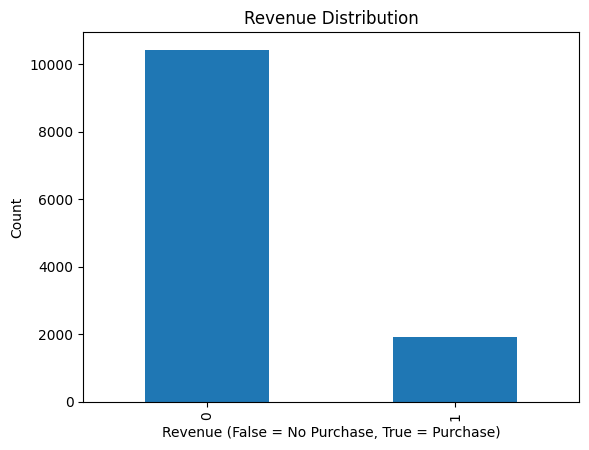

Revenue
0    84.53
1    15.47
Name: proportion, dtype: float64


In [ ]:
# Bar plot of Revenue
df['Revenue'].value_counts().plot(kind='bar')
plt.title('Revenue Distribution')
plt.xlabel('Revenue (False = No Purchase, True = Purchase)')
plt.ylabel('Count')
plt.show()

# Percentage of each class
percentages = df['Revenue'].value_counts(normalize=True) * 100
print(percentages.round(2))

**Observation**
- Most users (84.53%) did not buy anything.
- Only 15.47% of users made a purchase.
- This means the data is imbalanced because purchase cases are very few.

### Visitor Type vs Revenue

- Returning visitors convert significantly more than new visitors


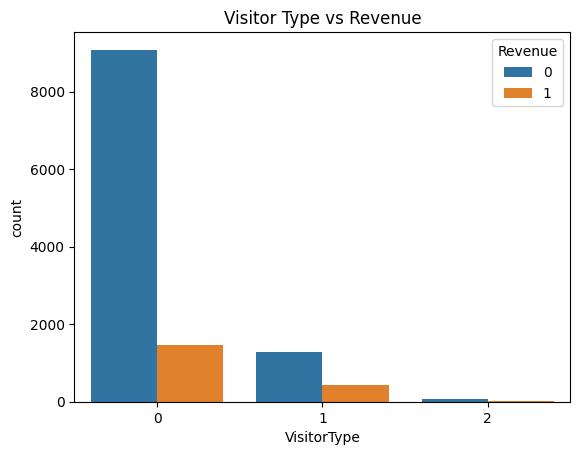

In [ ]:
sns.countplot(x='VisitorType', hue='Revenue', data=df)
plt.title("Visitor Type vs Revenue")
plt.show()

In [ ]:
# Which month has the highest purchases?
df.groupby('Month')['Revenue'].mean().round(3)

,Revenue
Month,
0,0.016
1,0.101
2,0.109
3,0.101
4,0.153
5,0.176
6,0.192
7,0.209
8,0.254


**Observation :**
- As you can see in output the rate increases month by month.
- The lowest conversions are in Month 0 (February).
- The highest conversions are in Month 8, which represents November (black friday).
- From summer to fall, customers are more likely to buy.

In [ ]:
# Weekend vs Weekday Purchases
df.groupby('Weekend')['Revenue'].mean().round(3)

,Revenue
Weekend,
0,0.149
1,0.174


**Observation:**
- On weekdays, about 15% of users buy something.
- On weekends, about 17% of users buy something.
- So, weekend users buy a little more than weekday users.

In [ ]:
df.groupby('TrafficType')['Revenue'].mean().round(3)

,Revenue
TrafficType,
1,0.107
2,0.216
3,0.088
4,0.154
5,0.215
6,0.119
7,0.300
8,0.277
9,0.095


**Observation**
- Some traffic sources convert better than others.
- TrafficType 16 (33.3%), TrafficType 7 (30%), and TrafficType 8 (27.7%) have the highest purchase rates.
- This means these sources bring users who are more likely to buy.
- TrafficType values like 12, 15, 17, 18 have a 0% purchase rate, meaning they rarely lead to sales.

## **2. Numeric Columns - Distribution Analysis**

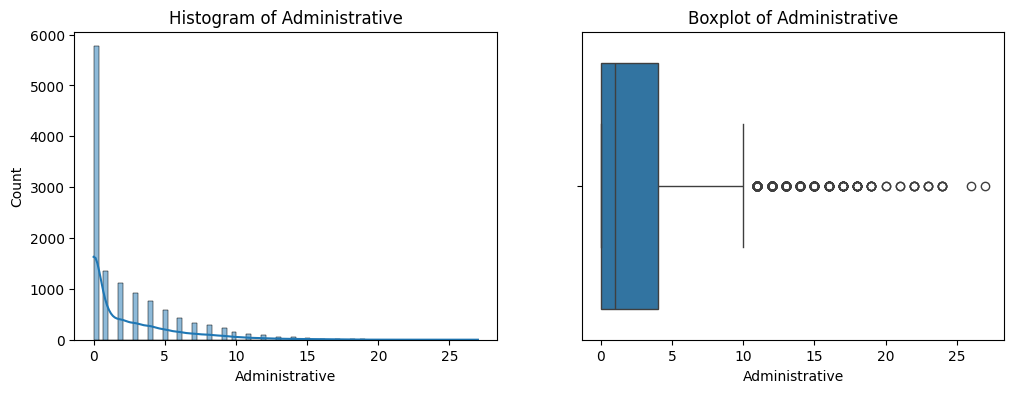

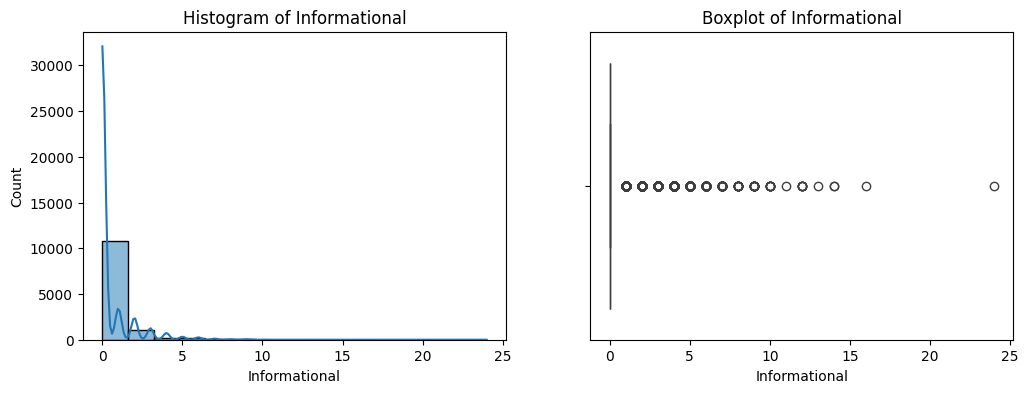

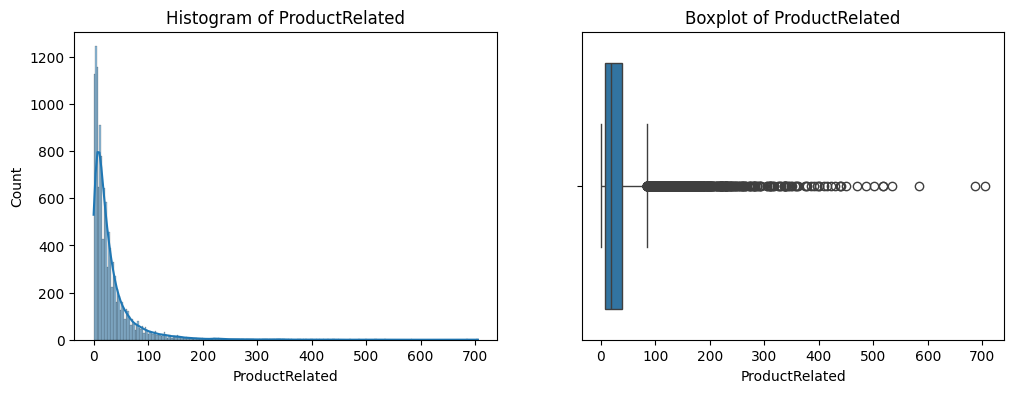

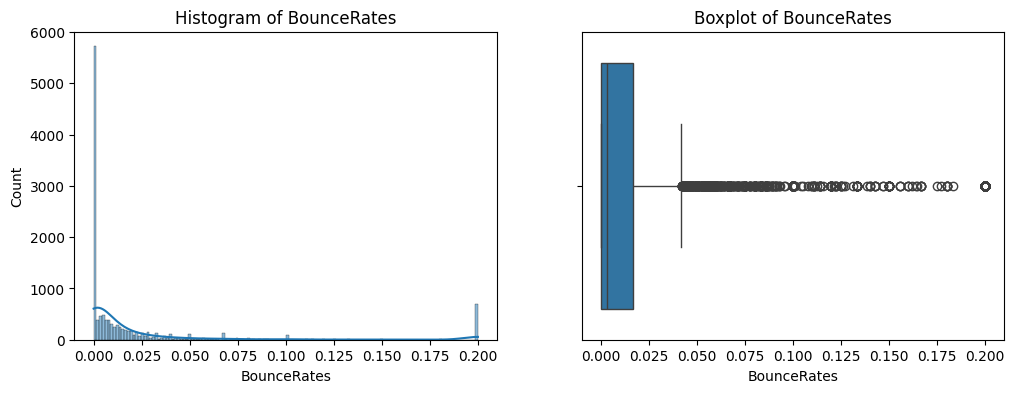

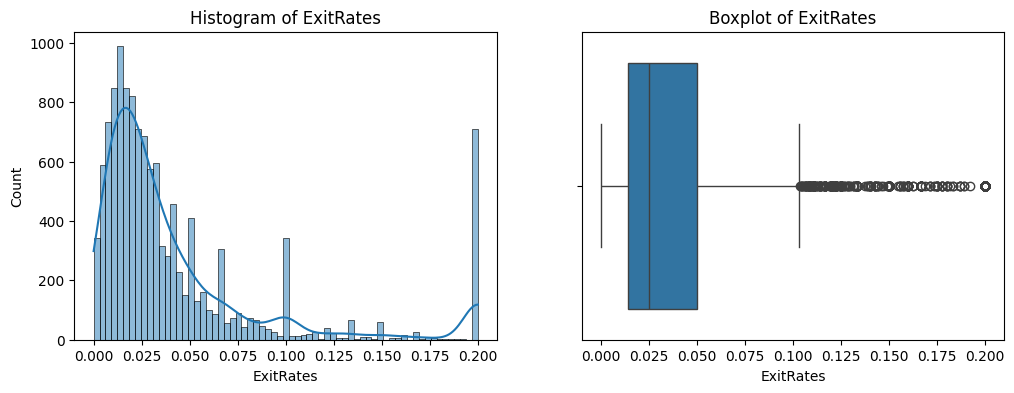

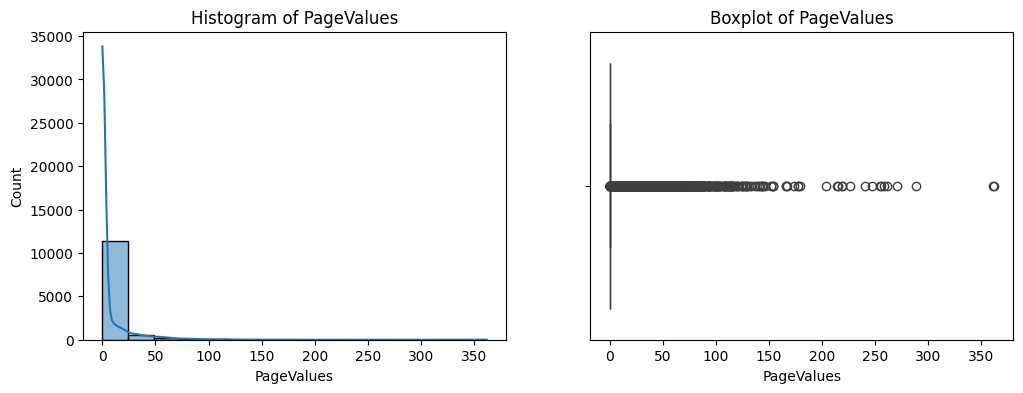

In [ ]:
numeric_cols = [
    'Administrative',
    'Informational',
    'ProductRelated',
    'BounceRates',
    'ExitRates',
    'PageValues'
]

# Plot histograms and boxplots
for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

**Observation**

**Administrative**
- Most users view very few or no administrative pages (like login, account, or policy pages).
- This suggests that many users land directly on product pages, often through ads or direct links.
- The long right tail (outliers) shows that a small group of users who are serious buyers spend more time managing accounts, orders, or checkout steps.
- Insight: Administrative pages are usually visited after a user decides to buy, not during browsing.

**Informational**
- Most values are 0, meaning users rarely spend time on informational pages.
- Users who visit many informational pages may be researching, not purchasing.
- A few users explore many info pages, creating outliers.
- Insight: Informational pages indicate interest or learning, but not strong buying intent.

**ProductRelated**
- Strong right skew with many large outliers.
- Users who view many product pages show high purchase intent.
- Outliers represent users comparing many products before buying.
- Insight: More product page views = higher engagement, which increases the chance of purchase.

**BounceRates**
- Most values are very low, users do not leave immediately.
- A second peak near 0.20 in Histogram shows some users leave quickly without interaction.
- Higher bounce rate usually means low interest.
- Insight: Users who spend more time on the website are more likely to buy than users who leave quickly.

**ExitRates**
- Bimodal pattern in Histogram:
  - Near 0 - users continue browsing.
  - Near 0.20 - users leave the site.
- Insight: High exit rates indicate drop-off points where users decide not to purchase.

**PageValues**
- Most values are 0, meaning no purchase related activity.
- Very large outliers appear when users complete checkout, payment, or confirmation pages.
- Higher PageValues strongly link to purchases.
- Insight: PageValues captures monetary intent, users with PageValues > 5 are very likely buyers.

## **BounceRates vs Revenue**


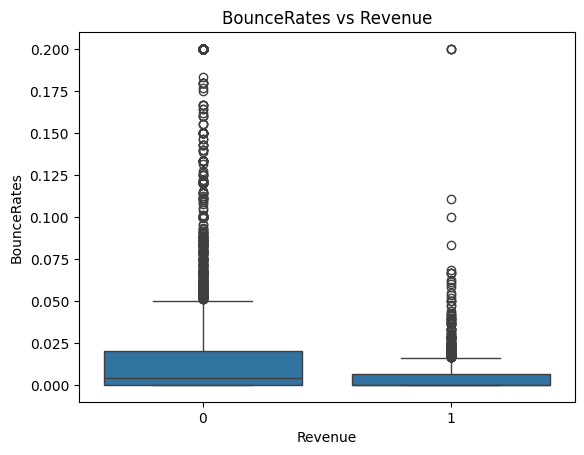

,BounceRates
Revenue,
0,0.025
1,0.005


In [ ]:
# Impact of Bounce Rates on Purchase Behavior
sns.boxplot(x='Revenue', y='BounceRates', data=df)
plt.title('BounceRates vs Revenue')
plt.show()

df.groupby('Revenue')['BounceRates'].mean().round(3)

**Observation:**
- The mean value for Revenue = 0 is about 0.025, while for Revenue = 1 it is much lower at 0.005. This shows that users who did not purchase tend to have higher average values for this metric. Both groups also have outliers around 0.20, indicating a few unusually high values.
- This means non-buyers leave the website more quickly, while buyers usually stay longer.

## **ExitRates vs Revenue**

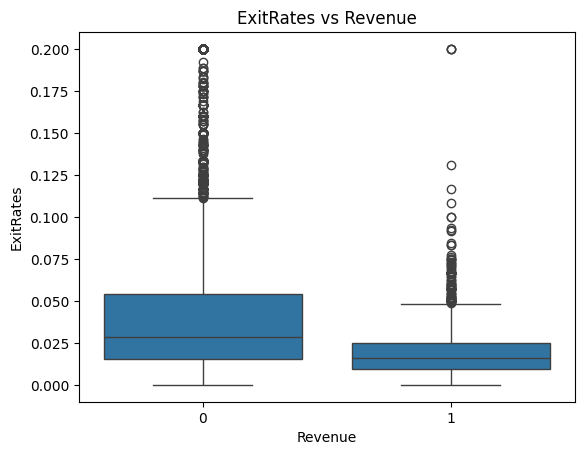

,ExitRates
Revenue,
0,0.047
1,0.020


In [ ]:
sns.boxplot(x='Revenue', y='ExitRates', data=df)
plt.title('ExitRates vs Revenue')
plt.show()

df.groupby('Revenue')['ExitRates'].mean().round(3)

**Observation:**
- Users who did not buy (Revenue = 0) have a higher average ExitRate (0.047) than users who bought something (Revenue = 1), whose ExitRate is lower (0.020).
- This means buyers usually stay on the website longer, while non-buyers tend to leave the site more quickly.

## **ProductRelated vs Revenue**

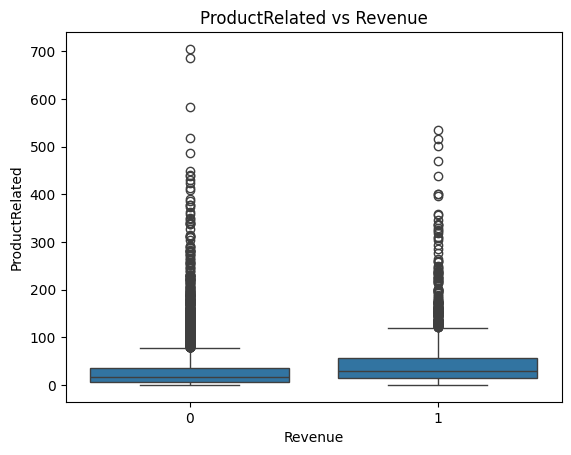

,ProductRelated
Revenue,
0,28.715
1,48.210


In [ ]:
sns.boxplot(x='Revenue', y='ProductRelated', data=df)
plt.title('ProductRelated vs Revenue')
plt.show()

df.groupby('Revenue')['ProductRelated'].mean().round(3)

**Observation:**
- Users who purchased (Revenue = 1) viewed more product-related pages on average (48.21) than users who did not purchase (28.72).
- This shows that buyers usually spend more time exploring product pages before making a purchase.

## **PageValues vs Revenue**

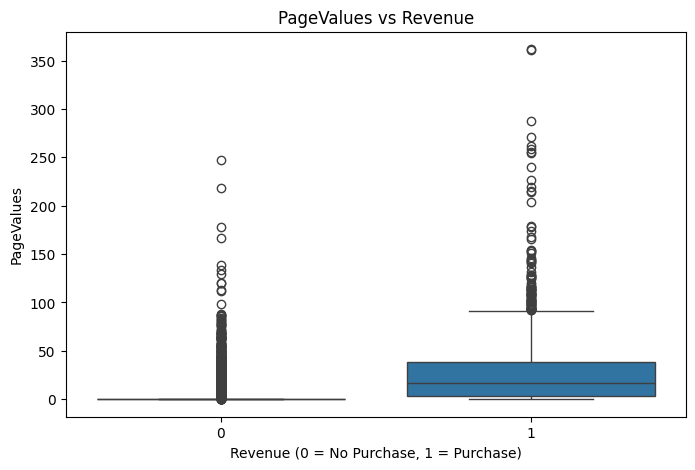

,PageValues
Revenue,
0,1.98
1,27.26


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Revenue', y='PageValues', data=df)
plt.title('PageValues vs Revenue')
plt.xlabel('Revenue (0 = No Purchase, 1 = Purchase)')
plt.ylabel('PageValues')
plt.show()

# Mean PageValues by Revenue
df.groupby('Revenue')['PageValues'].mean().round(2)

**Observation**
- Users who purchased (Revenue = 1) have a much higher average PageValues (27.26) than users who did not purchase (1.98).
- This means buyers usually visit more important pages, such as checkout, payment, or order confirmation pages.
- Visiting these high-value pages (PageValues > 5) greatly increases the chance of making a purchase.

## **Correlation Heatmap**

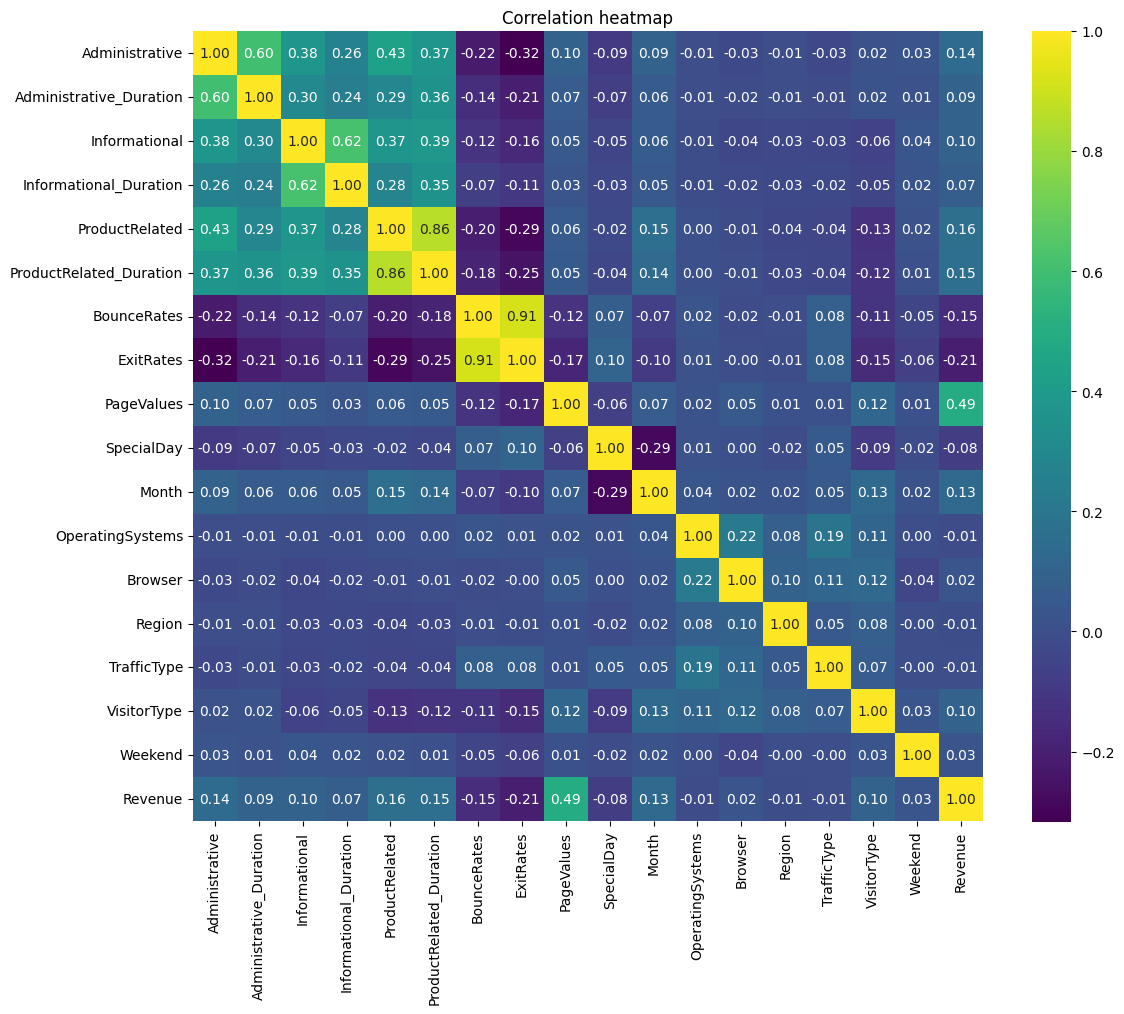

In [ ]:
# Correlation heatmap (numeric)
plt.figure(figsize=(12,10))
num = df.select_dtypes(include=[np.number])
corr = num.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", square=True)
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

**Correlation &  Observations**

**Strong Predictors of Revenue:**

**Positive correlation:**
- PageValues (0.49): When users visit high-value pages like checkout or payment pages, they are much more likely to buy.
- ProductRelated (0.16): Viewing more product pages slightly increases the chance of purchase.
- Informational (0.15): Reading information pages can slightly increase purchase likelihood, but the effect is small.

**Negative correlation:**
- ExitRates (-0.21): Users who leave pages quickly are less likely to buy.
- BounceRates (-0.15): If users leave after viewing only one page, the chance of purchase is lower.

**Other Key Observations (Multicollinearity):**
- BounceRates & ExitRates (0.91): These are very strongly related and show similar user behavior.
- Administrative & Administrative_Duration (0.60): More admin pages usually means more time spent on them.
- Informational & Informational_Duration (0.62): Viewing more info pages leads to longer time spent.
- ProductRelated & ProductRelated_Duration (0.86): Users who view many product pages also spend more time on them.

## **Behavior Time Analysis**

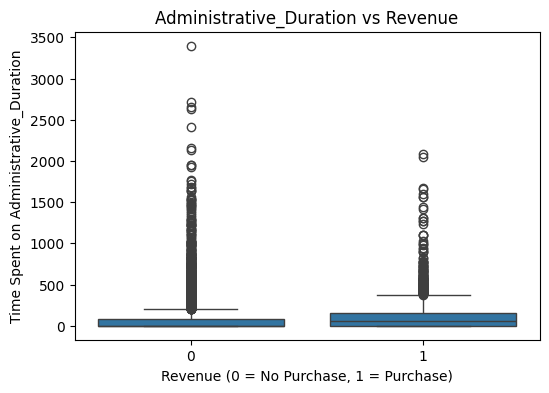

Mean Administrative_Duration by Revenue:
Revenue
0     73.74
1    119.48
Name: Administrative_Duration, dtype: float64



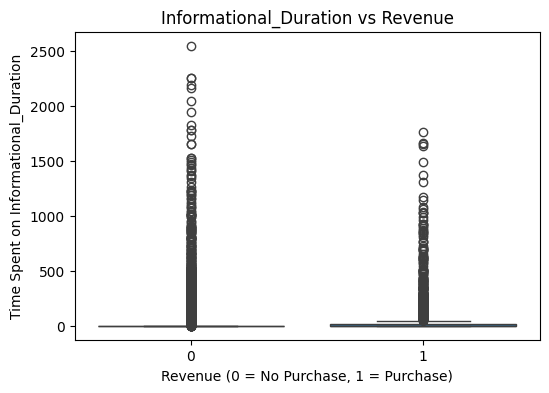

Mean Informational_Duration by Revenue:
Revenue
0    30.24
1    57.61
Name: Informational_Duration, dtype: float64



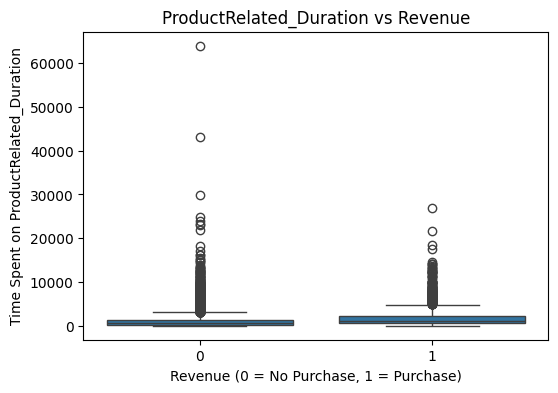

Mean ProductRelated_Duration by Revenue:
Revenue
0    1069.99
1    1876.21
Name: ProductRelated_Duration, dtype: float64



In [ ]:
time_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

for col in time_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Revenue', y=col, data=df)
    plt.title(f'{col} vs Revenue')
    plt.xlabel('Revenue (0 = No Purchase, 1 = Purchase)')
    plt.ylabel(f'Time Spent on {col}')
    plt.show()

    # Mean time spent by Revenue
    mean_values = df.groupby('Revenue')[col].mean().round(2)
    print(f"Mean {col} by Revenue:\n{mean_values}\n")

**Observation** — Behavior Time Analysis
- Buyers (Revenue = 1) spend more time on all types of pages than non-buyers.
  - Administrative pages: Buyers spend about 119.48 seconds, while non-buyers spend 73.74 seconds.
  - Informational pages: Buyers spend 57.61 seconds, compared to 30.24 seconds for non-buyers.
  - Product-related pages: Buyers spend much more time (1876.21 seconds) than non-buyers (1069.99 seconds).
- This shows that more time spent on pages, especially product pages, increases the chance of purchase.

## **Chi-Square Test**

**Weekend vs Revenue**
- H₀: Weekend does not affect the likelihood of purchase.
- H₁: Users are more likely to purchase on weekends.

In [ ]:
# Create a contingency table
contingency = pd.crosstab(df['Weekend'], df['Revenue'])
print("Contingency Table:\n", contingency)

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"\nChi-square statistic: {chi2:.3f}")  # Shows how different the observed data is from expected data.
print(f"P-value: {p:.3f}")                    # Shows if the relationship is statistically significant.

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject H0 → Weekend affects purchase likelihood")
else:
    print("Fail to reject H0 → Weekend does NOT affect purchase likelihood")

Contingency Table:
 Revenue     0     1
Weekend            
0        8053  1409
1        2369   499

Chi-square statistic: 10.391
P-value: 0.001
Reject H0 → Weekend affects purchase likelihood


**Observation**
- The Chi-square test shows a p-value of 0.001, which is less than 0.05.
- This means we reject the null hypothesis.
- Conclusion: Users are more likely to make a purchase on weekends than on weekdays.

## **T-Test - Bounce Rates vs Purchase**

T-statistic: -34.8464
P-value: 1.2936e-253
Degrees of freedom: 11795.09
Critical t-value: -1.6450


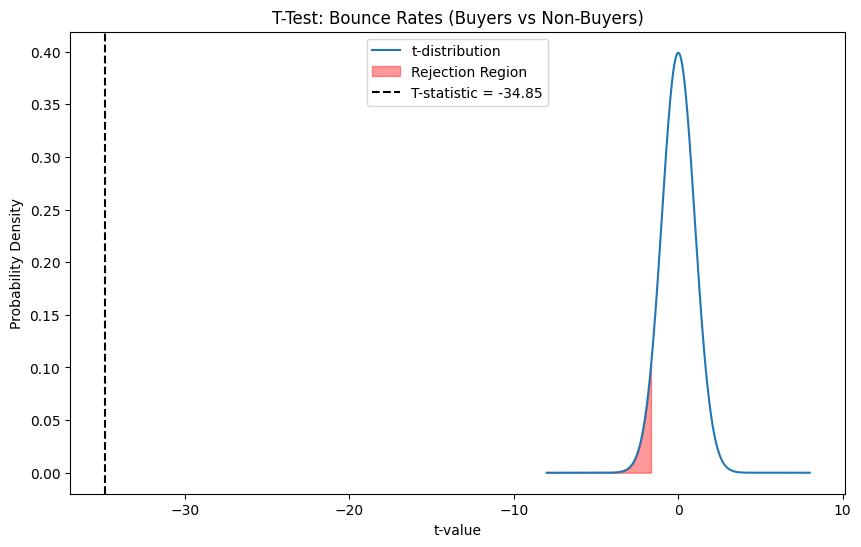

In [ ]:
from scipy.stats import ttest_ind
import scipy.stats as stats

# Separate groups
buyers = df[df['Revenue'] == 1]['BounceRates']
non_buyers = df[df['Revenue'] == 0]['BounceRates']

# One-tailed t-test (buyers < non_buyers)
t_stat, p_value = ttest_ind(buyers, non_buyers,
                            alternative='less', # buyers spend more time
                            equal_var=False)    # Welch's correction

print(f"T-statistic: {t_stat:.4f}")    # The t-statistic tells us how big the difference is between two groups compared to the variation in the data.
print(f"P-value: {p_value:.4e}")       # Shows if the relationship is statistically significant

# Standard deviations
sigma_buyers = buyers.std(ddof=1)
sigma_non_buyers = non_buyers.std(ddof=1)

# Sample sizes
n1 = len(buyers)
n2 = len(non_buyers)

# Calculate degrees of freedom
dof = ((sigma_buyers**2/n1 + sigma_non_buyers**2/n2)**2) / (
    ((sigma_buyers**2/n1)**2 / (n1 - 1)) +
    ((sigma_non_buyers**2/n2)**2 / (n2 - 1))
)

alpha = 0.05

# Critical value for one-tailed test
t_crit = stats.t.ppf(alpha, dof)

print(f"Degrees of freedom: {dof:.2f}")   # Degrees of Freedom (dof) tells us how much independent information is available to estimate differences between two groups.
print(f"Critical t-value: {t_crit:.4f}")  #The t-critical value is the cutoff point used to decide if the result is significant.


# Plotting t-distribution
x = np.linspace(-8, 8, 1000)
y = stats.t.pdf(x, dof)

plt.figure(figsize=(10,6))
plt.plot(x, y, label="t-distribution")  #  if the dof is large, And the t-distribution looks more like a normal curve.

# Shade rejection region (left tail)
plt.fill_between(x, y, where=(x <= t_crit), color='red', alpha=0.4, label='Rejection Region')

# Mark observed t-statistic
plt.axvline(t_stat, color='black', linestyle='--', label=f'T-statistic = {t_stat:.2f}')

plt.title("T-Test: Bounce Rates (Buyers vs Non-Buyers)")
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


**Observation**
- The test shows a very big difference between buyers and non-buyers.
- The t-statistic (–34.85) is much smaller than the cutoff (–1.645), and the p-value is almost zero.
- This means the result is highly significant, so we reject the null hypothesis.
- Buyers have much lower bounce rates than non-buyers.

# **Model Building**

## **1. Prepare Data for Modeling**
- Before training any model, you must prepare the dataset.

In [ ]:
#Split data into Train & Test
from sklearn.model_selection import train_test_split

X = df.drop('Revenue', axis=1) # all columns except the one we want to predict
y = df['Revenue'] #Target

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(9864, 17) (2466, 17)


#### **SMOTE**
We apply SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset because the number of buyers (Revenue = 1) is much smaller than non-buyers (Revenue = 0). This helps the model learn better from the minority class and improves prediction for buyers.

In [ ]:
# Apply SMOTE only on training data
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=1)  #repeatable results
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Revenue
0    8338
1    1526
Name: count, dtype: int64
After SMOTE: Revenue
0    8338
1    8338
Name: count, dtype: int64


### **Logistic Regression**

**2. Logistic Regression with Feature Scaling (Pipeline)**



In [ ]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Creating a pipeline
log_reg = Pipeline([
    ('scaler', StandardScaler()),          # Scale input features
    ('lr', LogisticRegression(
        max_iter=2000                      # Increase iterations to avoid convergence issues
    ))
])

# Train the model using SMOTE-balanced training data
log_reg.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred_lr = log_reg.predict(X_test)

# Predict probability of purchase
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))

print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2084
           1       0.52      0.69      0.59       382

    accuracy                           0.85      2466
   macro avg       0.73      0.79      0.75      2466
weighted avg       0.88      0.85      0.86      2466

ROC-AUC: 0.8555586819547587


**Confusion Matrix**
|                    | Predicted No (0)        | Predicted Yes (1)       |
| ------------------ | ----------------------- | ----------------------- |
| **Actual No (0)**  | **True Negative (TN)**  | **False Positive (FP)** |
| **Actual Yes (1)** | **False Negative (FN)** | **True Positive (TP)**  |


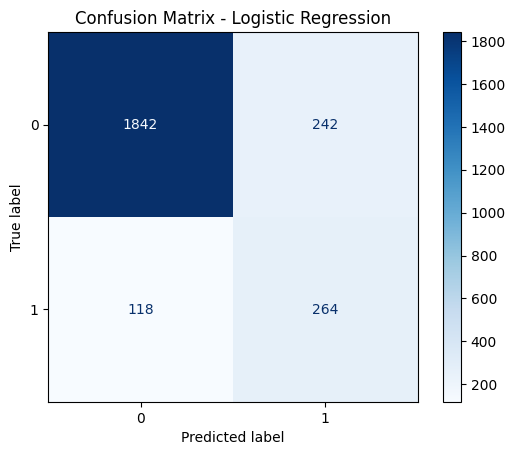

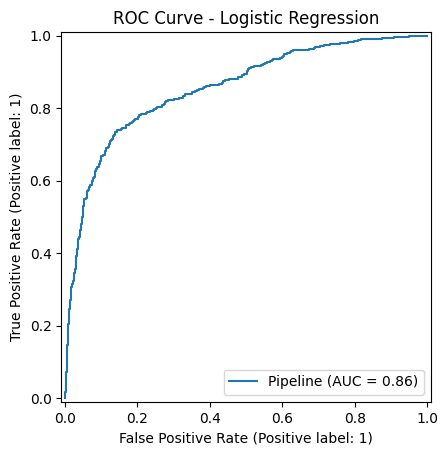

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

### **Observation:**
- Overall Performance: The model performs well with 85% accuracy and a ROC-AUC of 0.86, meaning it can generally distinguish buyers from non-buyers.
- Recall for Buyers: It correctly identifies about 69% of buyers, which is important for capturing potential customers.
- Precision for Buyers: Some non-buyers are predicted as buyers (242 false positives), which lowers precision to 0.52. This is expected due to fewer buyers in the dataset.

**Confusion Matrix Details:**
- True Negatives (1842): Non-buyers correctly predicted.
- True Positives (264): Buyers correctly predicted.
- False Positives (242): Non-buyers incorrectly predicted as buyers.
- False Negatives (118): Buyers incorrectly predicted as non-buyers, which affects recall but it’s still reasonable (0.69).

## Tried these but accoracy is not so good. We can remove in final notebook

**2. Logistic Regression (Class Weight + GridSearch)**



In [ ]:
log_reg = LogisticRegression(max_iter=2000)

pipe_lr = Pipeline([
    ('prep', preprocessor),
    ('clf', log_reg)
])

param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__class_weight': [None, 'balanced']
}

gs_lr = GridSearchCV(
    pipe_lr,
    param_grid_lr,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

gs_lr.fit(X_train_smote, y_train_smote)
gs_lr.best_params_

{'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2084
           1       0.52      0.69      0.59       382

    accuracy                           0.85      2466
   macro avg       0.73      0.79      0.75      2466
weighted avg       0.88      0.85      0.86      2466

ROC-AUC: 0.8556880646360703


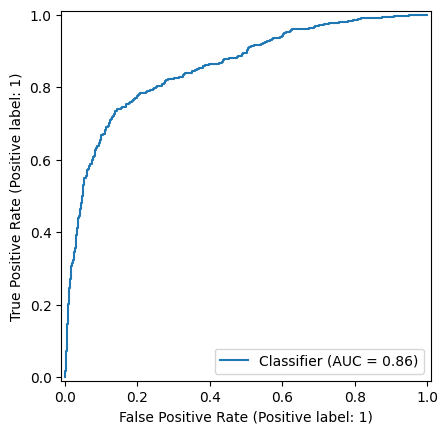

In [ ]:
y_pred_lrg = gs_lr.predict(X_test)
y_prob_lrg = gs_lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_lrg))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lrg))

RocCurveDisplay.from_predictions(y_test, y_prob_lrg)
plt.show()

**3. SVC with SMOTE + GridSearch**


In [ ]:
from sklearn.svm import SVC

svc = SVC(probability=True)

pipe_svc = Pipeline([
    ('prep', preprocessor),
    ('clf', svc)
])

param_grid_svc = {
    'clf__C': [0.1, 1, 10],
    'clf__gamma': ['scale', 'auto'],
    'clf__kernel': ['rbf']
}

gs_svc = GridSearchCV(
    pipe_svc,
    param_grid_svc,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

gs_svc.fit(X_train_smote, y_train_smote)
gs_svc.best_params_

{'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}

SVC ROC-AUC: 0.8518511772567857


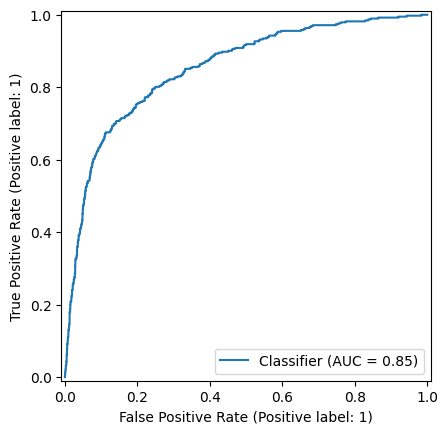

In [ ]:
y_prob_svc = gs_svc.predict_proba(X_test)[:,1]
print("SVC ROC-AUC:", roc_auc_score(y_test, y_prob_svc))

RocCurveDisplay.from_predictions(y_test, y_prob_svc)
plt.show()


### **Random Forest Classifier for Purchase Prediction**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Creating the Random Forest model
rf = RandomForestClassifier(
    n_estimators=200,        # Number of trees in the forest
    max_depth=10,            # Maximum depth of each tree
    random_state=42          # For consistent results
)
# Train the model using SMOTE-balanced training data
rf.fit(X_train_smote, y_train_smote)

# Predict the test data
y_pred_rf = rf.predict(X_test)
# Predict probabilities for the positive class (buyer = 1)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Results
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2084
           1       0.59      0.76      0.67       382

    accuracy                           0.88      2466
   macro avg       0.77      0.83      0.80      2466
weighted avg       0.90      0.88      0.89      2466

ROC-AUC: 0.9228602868024641


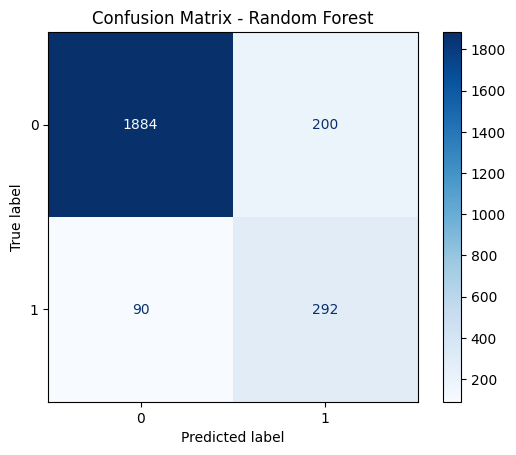

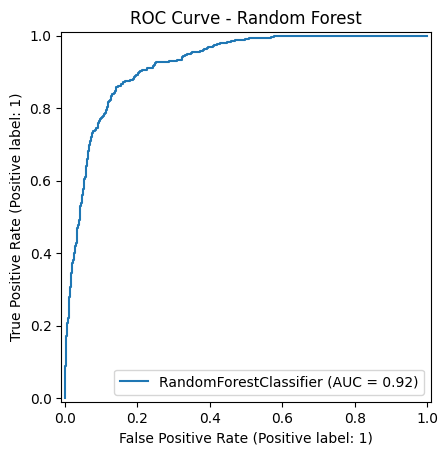

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

#### **Observation:**
- Accuracy (88%): Looks high, but can be misleading due to more non-buyers than buyers.
- ROC-AUC (0.92): Excellent ability to separate buyers from non-buyers when adjusting thresholds.
- Minority Class (Buyers) Performance:
  - Recall (0.77): Finds 77% of actual buyers, very good at catching potential buyers.
  - Precision (0.59): Only 59% of predicted buyers are correct, some non-buyers are misclassified.

**Confusion Matrix**
- True Negatives (1884): Most non-buyers are correctly classified.
- False Positives (200): Some non-buyers are wrongly predicted as buyers.
- False Negatives (90): Few buyers are missed by the model.
- True Positives (292): Majority of buyers are correctly detected.

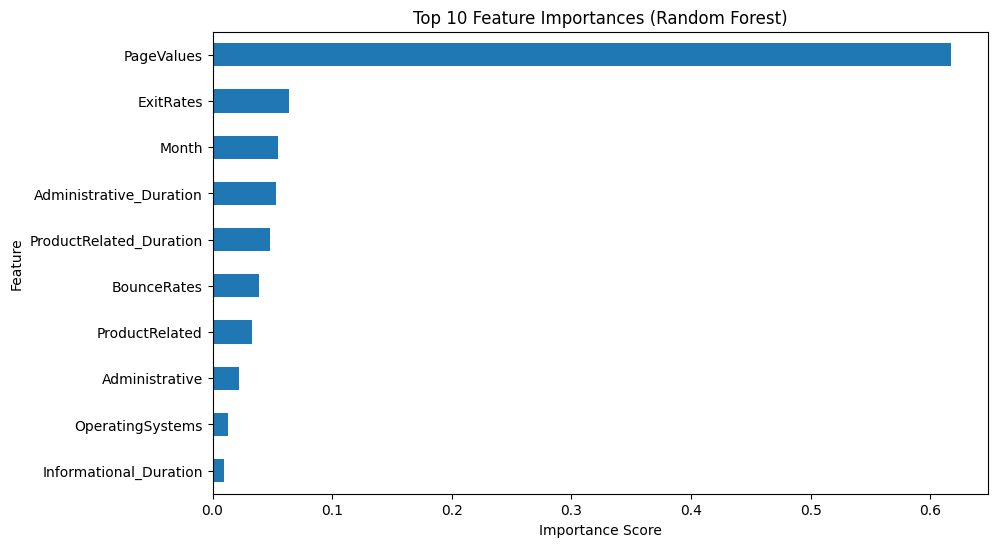

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from Random Forest
rf_feature_importance = pd.Series(
    rf.feature_importances_,  # Feature importance values from RF model
    index=X.columns            # Feature names
).sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,6))
rf_feature_importance.head(10).plot(kind='barh')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


### **Observation**

**Most Important Feature**
- PageValues is by far the strongest predictor. Its importance score is around 0.6, meaning it contributes about 60% to the model’s decision. Users who visit higher-value pages are much more likely to make a purchase.

**Secondary Features**
- ExitRates, Administrative_Duration, ProductRelated_Duration have smaller importance scores (all below 0.1). This shows that while how long a user spends and where they leave the site matters, it is much less influential than PageValues.

**Least Important Features**
- OperatingSystems, Informational_Duration barely impact the model. The type of device or time spent on informational pages doesn’t strongly affect purchase decisions in this dataset.

**Understanding the X-Axis (Importance Score)**
- The importance score tells you what percentage of the model’s decision-making is based on that feature.
  - PageValues = 0.6 - 60% of the model’s decisions rely on this feature.
  - ExitRates = 0.05 - only 5% of the decisions rely on this feature.

### **Gradient Boosting Classifier for Purchase Prediction**

In [ ]:
# Creating the Gradient Boosting model
gbt = GradientBoostingClassifier(
    n_estimators=150,              # Number of boosting stages
    learning_rate=0.1,             # How much each tree contributes to the final model
    max_depth=3,                   # Maximum depth of each tree
    random_state=42                # For consistent results
)

# Train the model using SMOTE-balanced training data
gbt.fit(X_train_smote, y_train_smote)

# # Predict on test data
y_pred_gb = gbt.predict(X_test)
# Predict probability of purchase
y_prob_gb = gbt.predict_proba(X_test)[:, 1]

print("Gradient Boosting Results")
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))


Gradient Boosting Results
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2084
           1       0.61      0.73      0.67       382

    accuracy                           0.89      2466
   macro avg       0.78      0.82      0.80      2466
weighted avg       0.90      0.89      0.89      2466

ROC-AUC: 0.9254177930078082


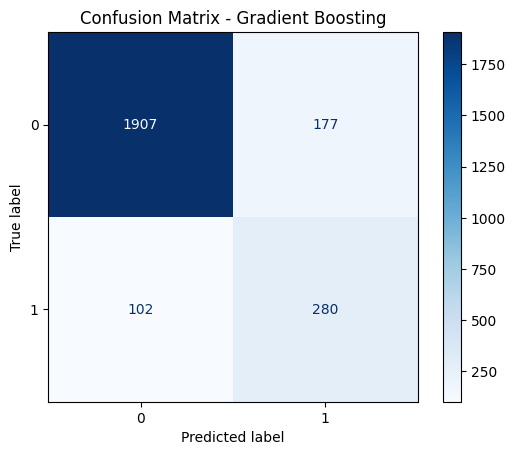

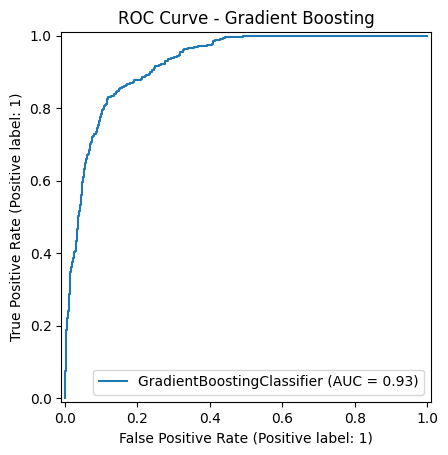

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(gbt, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

# ROC - AUC
RocCurveDisplay.from_estimator(gbt, X_test, y_test)
plt.title("ROC Curve - Gradient Boosting")
plt.show()

### **Observation:**
- The Gradient Boosting model shows the best overall performance among all models. It achieves 89% accuracy and a high ROC-AUC score of 0.925, meaning it can clearly distinguish between buyers and non-buyers.

- The model correctly identifies 73% of actual buyers, which is important for capturing potential customers. Although some non-buyers are still predicted as buyers, this trade-off is smaller and more balanced compared to the other models. Overall, Gradient Boosting is the strongest and most reliable model for purchase prediction in this dataset.

**Confusion Matrix:**
- True Negatives (1907): Correctly predicted non-buyers.
- False Positives (177): Non-buyers predicted as buyers.
- False Negatives (102): Buyers missed.
- True Positives (280): Buyers correctly detected.

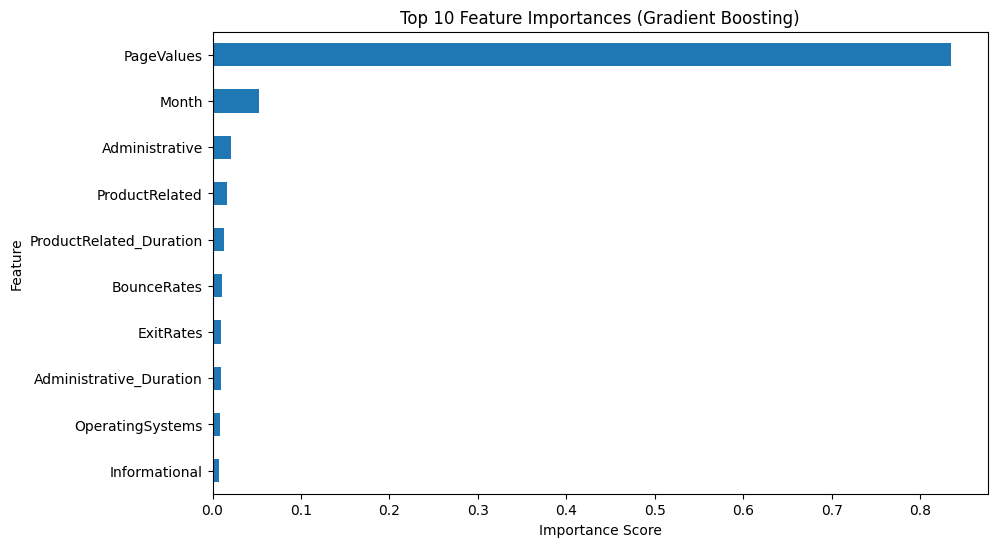

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = pd.Series(
    gbt.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

**Observation**

**Important Feature - PageValues:**
- PageValues is by far the most important feature, with an importance score of about 0.86. This means the model mainly relies on the value of pages a user visits (such as checkout or payment pages) to predict whether they will make a purchase.

**Secondary Feature - Month**
- Month is the second most important feature, but its impact is much smaller (around 0.05). This shows that the time of year has only a minor effect compared to PageValues.

**Minor Impact- Administrative & ProductRelated:**
These features contribute very little to the model’s decisions. The number of pages visited matters far less than the value of those pages.

**Least Important Features:**
Features like ProductRelated_Duration, Administrative_Duration, BounceRates, ExitRates, OperatingSystems, and Informational have almost no impact on the predictions once PageValues is considered.

**Overall Conclusion**
The model relies mostly on PageValues to make predictions. While multiple features are included, PageValues alone explains most of the model’s decision-making, and the other features only make small adjustments.

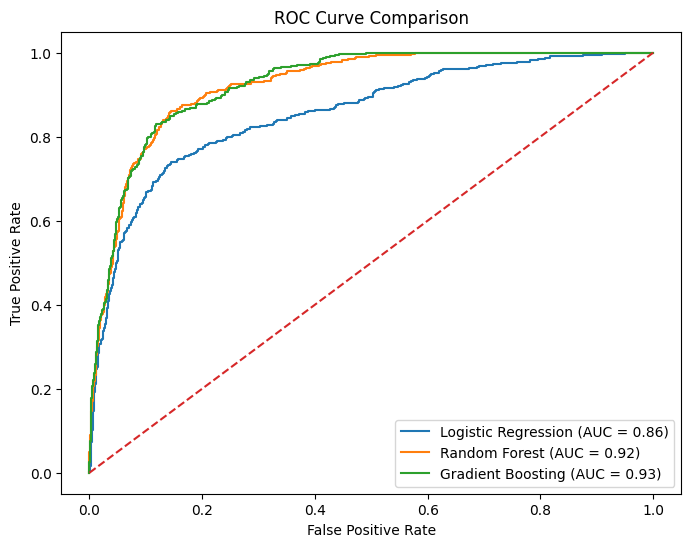

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')

# Random baseline
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


SHAP (SHapley Additive exPlanations) shows how much each feature contributes to a model’s prediction for a specific instance or overall.
- Positive SHAP value: The feature pushes the prediction toward the target.
- Negative SHAP value: The feature pushes the prediction away from the target.
- Magnitude: The farther from 0, the stronger the impact.

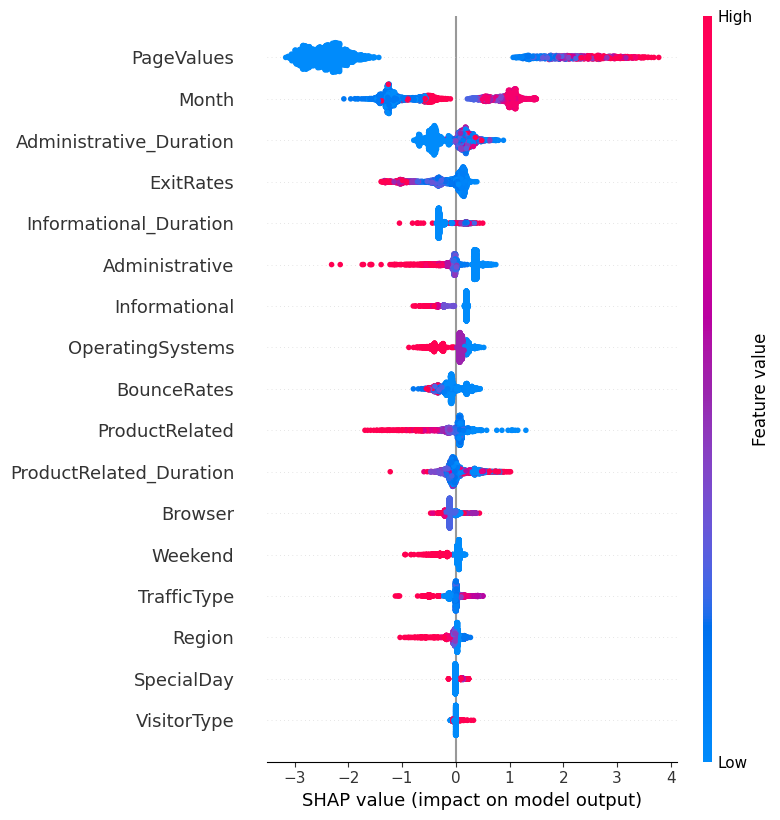

In [ ]:
import shap

# Create SHAP explainer for Gradient Boosting
explainer = shap.TreeExplainer(gbt)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=X_test.columns
)

- PageValues is the most important feature and strongly increases the chance of purchase.
- High ExitRates and BounceRates reduce the likelihood of conversion.
- Month has a moderate impact, showing some seasonal influence on purchases.
- Spending more time on Administrative and Informational pages slightly increases purchase probability.
- Visiting many Administrative or ProductRelated pages without high page value may indicate lower buying intent.
- Technical and demographic features (Browser, OperatingSystems, Region) have minimal impact.
- Weekend and SpecialDay have very weak influence on the model’s predictions.
- Overall, the model mainly depends on page value and user engagement, while other features contribute very little.

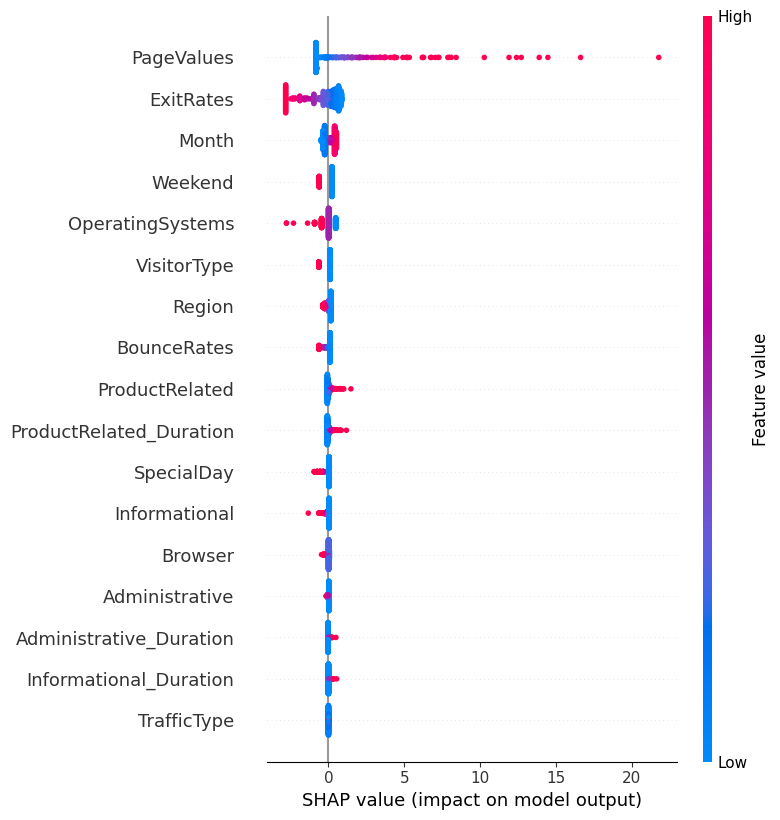

In [ ]:
import shap

# Get best model from GridSearch
best_model = gs_lr.best_estimator_

# Sample test data
X_sample = X_test.sample(500, random_state=42)

# Transform data using the correct step name
X_sample_scaled = best_model.named_steps['prep'].transform(X_sample)

# Create SHAP explainer
explainer = shap.Explainer(
    best_model.named_steps['clf'],   # Logistic Regression
    X_sample_scaled
)

# Calculate SHAP values
shap_values = explainer(X_sample_scaled)

# Plot SHAP summary
shap.summary_plot(
    shap_values,
    features=X_sample,
    feature_names=X.columns
)

plt.show()


The SHAP plot shows which features matter most and whether they increase or decrease the chance of purchase.

**Observation** What the plot shows
- The horizontal line (X-axis) shows how each feature affects the prediction:
- Positive values (right side of 0)
  - The feature increases the chance of a purchase.
- Negative values (left side of 0)
  - The feature decreases the chance of a purchase.
  
Colors:
- Red = high feature value
- Blue = low feature value

**Most Important Features**
- PageValues: This is the most important feature.
  - When PageValues is high, the model strongly predicts that a user will make a purchase.
- ExitRates: This feature works in the opposite way.
 - High exit rates reduce the chance of a purchase.

**Moderately Important Features**
- ProductRelated and ProductRelated_Duration
  - Users who view more product pages and spend more time on them are more likely to buy.
- Month and Weekend  
  - Purchase behavior changes based on time and day, giving these features a moderate influence.
- SpecialDay
  - Being close to a special day does not always increase purchases.
  - Its effect depends on user behavior and context.

**Least Important Features**
- Informational
  - Users on informational pages are usually browsing or learning, not ready to buy.
- Browser
  - The type of browser used has almost no impact on purchase decisions.        

# **Comparison Table**
| Model               | Accuracy | Precision (buyers) | Recall (buyers) | F1-score (buyers) | ROC-AUC |
| ------------------- | -------- | ------------------ | --------------- | ----------------- | ------- |
| Logistic Regression | 0.85     | 0.52               | 0.69            | 0.59              | 0.856   |
| Random Forest       | 0.88     | 0.59               | 0.76            | 0.67              | 0.923   |
| Gradient Boosting   | 0.89     | 0.61               | 0.73            | 0.67              | 0.925   |


- Precision refers to buyers correctly predicted
- Recall refers to buyers correctly predicted
- F1-score: A balance between precision and recall.
- ROC-AUC: How good the model is at telling buyers and non-buyers apart.

**Logistic Regression**
- Predicts some non-buyers as buyers (precision = 0.52).
- Finds many real buyers (recall = 0.69).
- A good baseline model, but weaker than ensemble methods.

**Random Forest**
- Better at finding buyers (precision = 0.59, recall = 0.76).
- Good balance between catching buyers and avoiding false alerts.
- ROC-AUC = 0.923, showing strong class separation.

**Gradient Boosting**
- Highest accuracy and best ROC-AUC (0.925).
- Slightly better precision than Random Forest (0.61).
- Slightly lower recall (0.73), but more balanced overall.

**Gradient Boosting is the best overall model because it gives the most balanced performance. It is good at finding buyers and at not wrongly predicting non-buyers as buyers. That’s why it has the highest accuracy and ROC-AUC.**

 # **Overall Conclusion:**

The analysis shows that user behavior and page value are the strongest predictors of purchase. Buyers tend to visit more valuable pages, spend more time on product-related pages, and have lower exit and bounce rates. Temporal factors like Month and Weekend have moderate influence, while technical or demographic features (Browser, OperatingSystem, Region) have minimal impact.

Among the models tested, Gradient Boosting performs best, achieving the highest accuracy (89%), ROC-AUC (0.93), and a good balance between precision and recall for buyers. Random Forest is slightly better at capturing more buyers but with more false positives, while Logistic Regression provides a solid baseline.

Feature importance and SHAP analysis confirm that PageValues drives the majority of the model’s predictions, followed by engagement and temporal features. Overall, predictive performance is strong, and the models effectively identify potential buyers while highlighting which behaviors most influence purchase decisions.

## **Model deployment to predict purchases for new users**
- Save the model: joblib.dump stores your trained model so you don’t have to train it again.
- Load the model: joblib.load brings the saved model back to use for predictions.
- Predict: predict() tells if a user will buy or not, predict_proba() gives the chance of buying.
- Combine results: Add predictions to your data to see who is likely to buy, useful for reports or dashboards.

In [ ]:
import joblib  #joblib = save your model once, use it anytime.

# Save the trained model
joblib.dump(gbt, 'gbt_model.pkl')
print("Gradient Boosting model saved!")

# Load the saved model
loaded_gbt = joblib.load('gbt_model.pkl')
print("Model loaded successfully!")

# let's use a sample from test data # Here we can add new  data
new_user_data = X_test.sample(5, random_state=42)

# Predict classes (0 = non-buyer, 1 = buyer)
pred_labels = loaded_gbt.predict(new_user_data)

# Predict probabilities of being a buyer
pred_probs = loaded_gbt.predict_proba(new_user_data)[:, 1]

# Combine results
results = new_user_data.copy()
results['Predicted_Label'] = pred_labels
results['Purchase_Probability'] = pred_probs

print(results)

Gradient Boosting model saved!
Model loaded successfully!
      Administrative  Administrative_Duration  Informational  \
649                2                     34.0              0   
5431               0                      0.0              0   
9120               0                      0.0              0   
2392               0                      0.0              0   
741                0                      0.0              0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
649                      0.0              81              2241.002381   
5431                     0.0              28               608.522727   
9120                     0.0              13               514.416667   
2392                     0.0               3               127.000000   
741                      0.0              38               667.166667   

      BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
649      0.002439   0.007012       0.

**Predicted_Label**
- This is the binary output: 0 (No Purchase) or 1 (Will Purchase).
- It comes from the model applying a threshold, usually 0.5.
- If Purchase_Probability >= 0.5 - Predicted_Label = 1, If < 0.5  - Predicted_Label = 0
- Use it when you just want a clear yes/no answer [we can use this to Send a discount to this user or not.]

**Purchase_Probability**
- This shows how confident the model is that the user will purchase.
It’s a number between 0 and 1 (e.g., 0.95 → very likely to buy, 0.01 → very unlikely).
- Use it when you want to prioritize actions:
  - High probability - target premium offers
  - Medium - maybe send a reminder
  - Low - ignore